# Scikit-learn PCA 實作

## 載入相關套件

In [2]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. 載入資料

In [3]:
ds = datasets.load_wine() # datasets.load_iris(), datasets.load_wine(), datasets.load_breast_cancer()
df = pd.DataFrame(ds.data, columns=ds.feature_names) # pd.DataFrame(ds.data, columns=ds.feature_names), columns=ds.feature_names
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

## 2. 資料清理、資料探索與分析

In [3]:
# 資料集說明
print(ds.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

## 3. 資料分割

In [5]:
from sklearn.model_selection import train_test_split # 資料分割
from sklearn.metrics import accuracy_score # 計算準確率

# 指定X、Y
X = df.values #二維
y = ds.target #一維

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.2,
                                                    random_state=100)

# 查看陣列維度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142,), (36,))

## 4. 特徵縮放

將資料移到座標中心點

In [ ]:
from sklearn.preprocessing import StandardScaler
# 標準化
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train) # train要fit_transform
X_test_std = scaler.transform(X_test) # test只要transform

## 特徵萃取(PCA)

In [7]:
from sklearn.decomposition import PCA
# PCA降維
pca1 = PCA(n_components=2) # 主成分數量=2,設定成2維
X_train_pca = pca1.fit_transform(X_train_std) # 訓練資料降維,從13維降到2維
X_test_pca = pca1.transform(X_test_std) # 測試資料降維
X_train_pca.shape, X_test_pca.shape, pca1.explained_variance_ratio_ # 主成分解釋變異量比例,總和約0.57;表示降維後的2維資料約保留57%的資訊;
# pca1.eexplained_variance_ratio_ # 主成分解釋變異量比例 

((142, 2), (36, 2), array([0.36457748, 0.20234607]))

## 5. 選擇演算法 (分類器模型)

In [8]:
from sklearn.linear_model import LogisticRegression # 邏輯斯迴歸
# 建立分類器

clf = LogisticRegression()

## 6. 模型訓練

In [ ]:
clf.fit(X_train_pca, y_train) # 訓練模型

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


## 7. 模型計分

In [ ]:
# 計算準確率
y_pred = clf.predict(X_test_pca) # 預測predict(X_test_pca) 
# y_pred== y_test # 預測結果與實際結果比較
print(f'{accuracy_score(y_test, y_pred)*100:.2f}%')  # accuracy_score(y_test, y_pred)*100 # 準確率
# y_pred / y_test # 預測結果與實際結果比較

97.22%


## 繪製決策邊界(Decision regions)

In [11]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    color=cmap(idx),
                    marker=markers[idx], 
                    label=cl)

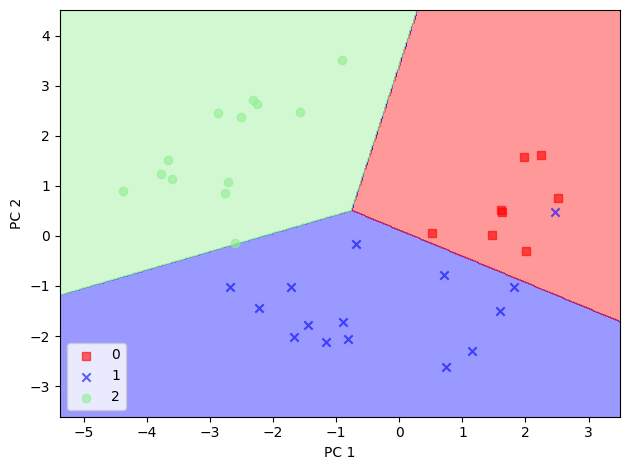

In [12]:
plot_decision_regions(X_test_pca, y_test, classifier=clf)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('decision_regions.png', dpi=300)
plt.show()

## 使用全部特徵

In [4]:
# 載入資料集
# ds = datasets.load_wine()
# df = pd.DataFrame(ds.data, columns=ds.feature_names) # pd.DataFrame(ds.data, columns=ds.feature_names), columns=ds.feature_names
# df.head()

# 也可以用下面這行將上面兩行簡化

X, y = datasets.load_wine(return_X_y=True) # X, y = datasets.load_wine(return_X_y=True) # 直接取得X、y

# 資料分割

from sklearn.model_selection import train_test_split # 資料分割
from sklearn.metrics import accuracy_score # 計算準確率

# 指定X、Y
# X = df.values #二維
# y = ds.target #一維

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2) # 20%測試資料,80%訓練資料

# 查看陣列維度
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# 特徵縮放
from sklearn.preprocessing import StandardScaler # 標準化
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# 模型訓練
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_std, y_train)

# 模型計分
y_pred = clf.predict(X_test_std)
print(f'{accuracy_score(y_test, y_pred)*100:.2f}%') 

(142, 13) (36, 13) (142,) (36,)
94.44%


## 測試Scikit-learn 的PCA函數其他用法

In [6]:
# 不設定PCA參數數量
from sklearn.decomposition import PCA
pca1 = PCA()
# 
X_train_pca = pca1.fit_transform(X_train_std)
pca1.explained_variance_ratio_

array([0.36963286, 0.19151352, 0.09811214, 0.07539558, 0.06702514,
       0.05112182, 0.04046612, 0.02685288, 0.02463498, 0.01887321,
       0.01751853, 0.01185592, 0.00699729])

In [7]:
# 加總可解釋變異
np.sum(pca1.explained_variance_ratio_)

np.float64(1.0)

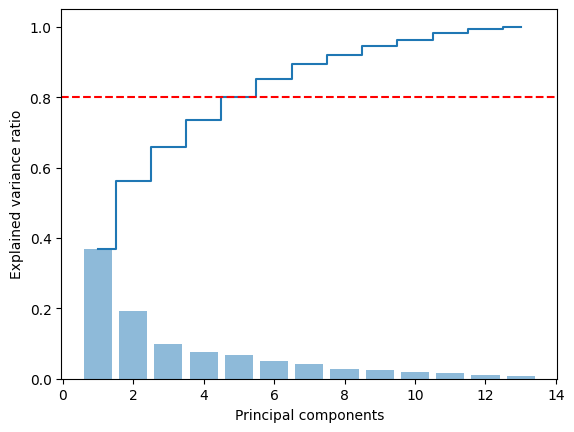

In [8]:
# 對可解釋變異繪製柏拉圖(Pareto)
plt.bar(range(1, 14), pca1.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca1.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.axhline(0.8, color='r', linestyle='--')

In [9]:
# 設定可解釋變異下限
pca2 = PCA(0.8)
X_train_pca = pca2.fit_transform(X_train_std)
X_train_pca.shape

(142, 5)